In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Section 1. Load and Visualize the data
- Download
- Load
- Visualize
- Normalisation

In [2]:
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
Y = pd.read_csv("./Training Data/Linear_Y_Train.csv")

In [3]:
X.shape , Y.shape

((3750, 1), (3750, 1))

In [4]:
type(X) , type(Y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [5]:
# Convert X,Y to numpy arrays
x = X.values
y = Y.values

type(x) , type(y)

(numpy.ndarray, numpy.ndarray)

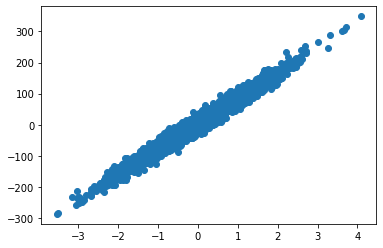

In [6]:
plt.scatter(X,y)
plt.show()

In [7]:
# Normalisation

u = x.mean()
std = x.std()

x = (x-u)/std
x


array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

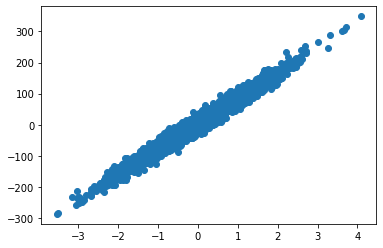

In [8]:
# Visualisation 

plt.scatter(X,y)
plt.show()

# Section 2 - Linear Regression

In [9]:
X.shape

(3750, 1)

In [10]:
#theta = [theta0,theta1]
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_


def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y = Y[i]
        x = X[i]
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)  # gradient wrt theta0
        grad[1] += (y_ - y)*x # gradient wrt theta1    
    return grad/m


def error(X,Y,theta):
    m = x.shape[0]
    total_error= 0.0 
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m


def gradientDescent(x,y,max_steps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        # Compute Grad
        grad = gradient(X,Y,theta)
        e = error(x.y,theta)
        theta_list.append(theta[0],theta[1])
        error_list.append(e)
        
        # Update Theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list,theta_list

In [11]:
theta_list = np.array(theta_list)
# error_list

NameError: name 'theta_list' is not defined

In [ ]:
theta,error_list,theta_list = gradientDescent(X,y)

## Section 4 - Computing Score
- Score : R2 (R-Squared) or Coefficient of Determination

In [ ]:
def r2_score(Y,Y_):
    # Instead of for loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [ ]:
r2_score(y,y_)

# Section 5 - Visualizing Loss Function, Gradient Descent, Theta Updates

In [ ]:
# Loss Actually

T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i  in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)
        
print(J.shape)

In [ ]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
plt.show()

In [ ]:
# Contour Plot
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0,T1,J,cmap = 'rainbow')
plt.show()

In [ ]:
 # 2D Contour Plot
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()


In [ ]:
theta_list
np.save("Thetalist.npy",theta_list)